In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")


In [2]:
apps = pd.read_csv("../data/apps.csv")
apps.head()


,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
apps.info()
apps.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.0+ MB


,Unnamed: 0,Rating,Reviews,Size
count,9659.000000,8196.000000,9.659000e+03,8432.000000
mean,5666.172896,4.173243,2.165926e+05,20.395327
std,3102.362863,0.536625,1.831320e+06,21.827509
min,0.000000,1.000000,0.000000e+00,0.000000
25%,3111.500000,4.000000,2.500000e+01,4.600000
50%,5814.000000,4.300000,9.670000e+02,12.000000
75%,8327.500000,4.500000,2.940100e+04,28.000000
max,10840.000000,5.000000,7.815831e+07,100.000000


In [4]:
apps.isnull().sum()


Unnamed: 0           0
App                  0
Category             0
Rating            1463
Reviews              0
Size              1227
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [5]:
apps.dropna(subset=['Rating'], inplace=True)
apps.fillna('Unknown', inplace=True)


C:\Users\Vaishnavi\AppData\Local\Temp\ipykernel_11128\2218753042.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  apps.fillna('Unknown', inplace=True)


In [6]:
apps['Installs'] = apps['Installs'].str.replace('[+,]', '', regex=True).astype(int)
apps['Price'] = apps['Price'].str.replace('$', '').astype(float)
apps['Reviews'] = apps['Reviews'].astype(int)


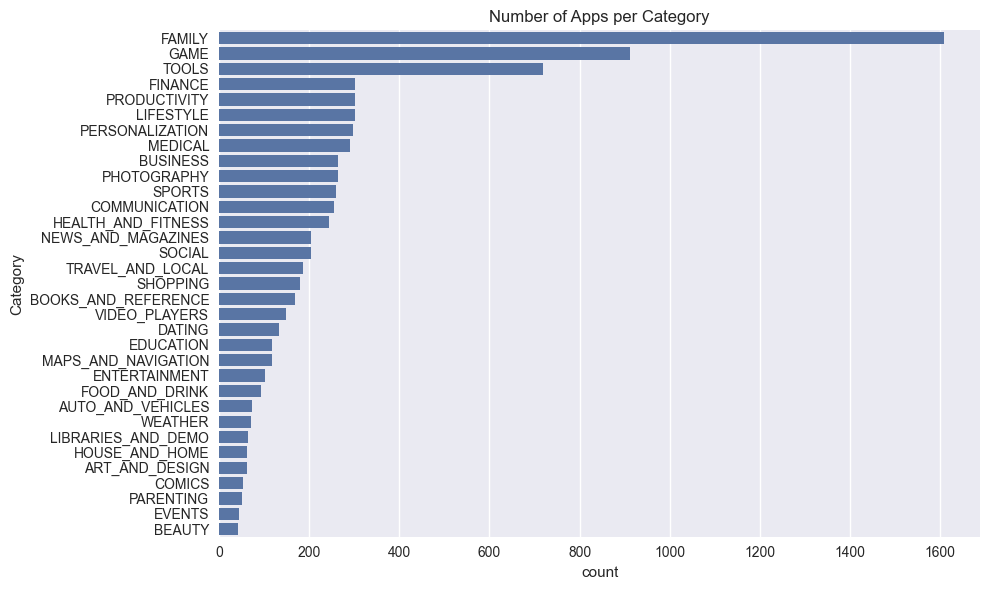

In [7]:
plt.figure(figsize=(10,6))
sns.countplot(y='Category', data=apps, order=apps['Category'].value_counts().index)
plt.title("Number of Apps per Category")
plt.tight_layout()
plt.show()


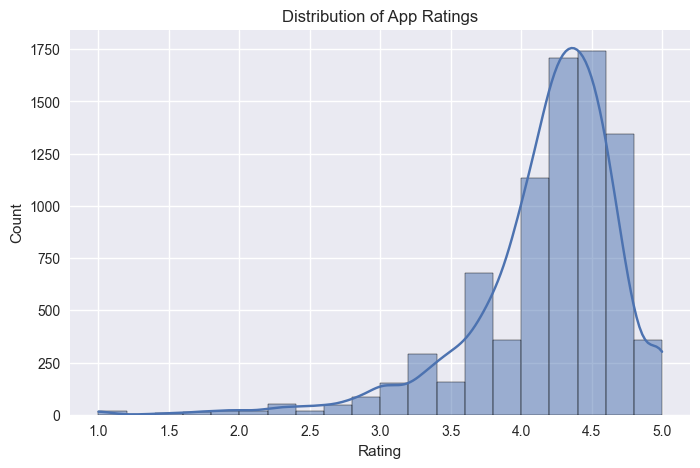

In [8]:
plt.figure(figsize=(8,5))
sns.histplot(apps['Rating'], bins=20, kde=True)
plt.title("Distribution of App Ratings")
plt.show()


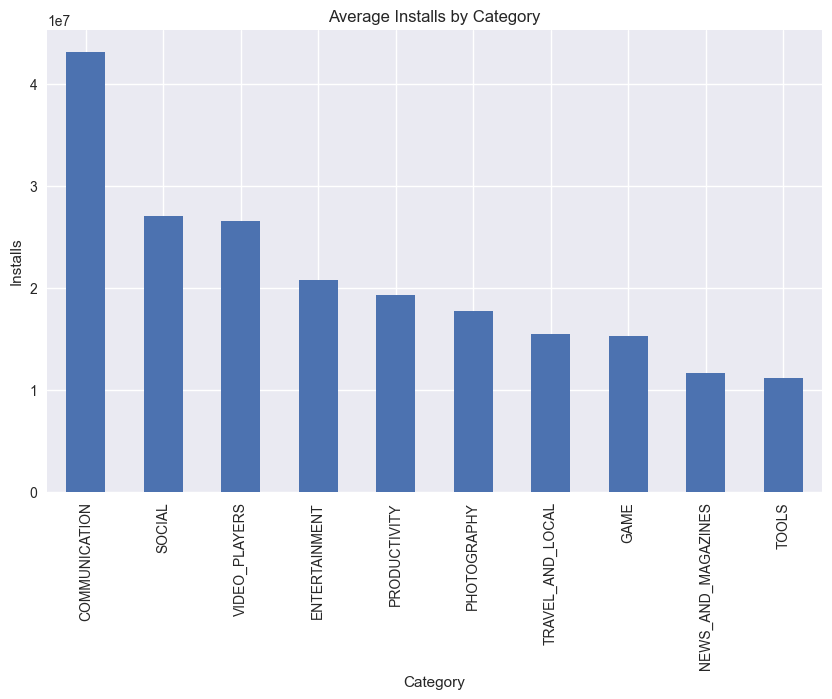

In [9]:
top_installs = apps.groupby('Category')['Installs'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
top_installs.head(10).plot(kind='bar')
plt.title("Average Installs by Category")
plt.ylabel("Installs")
plt.show()


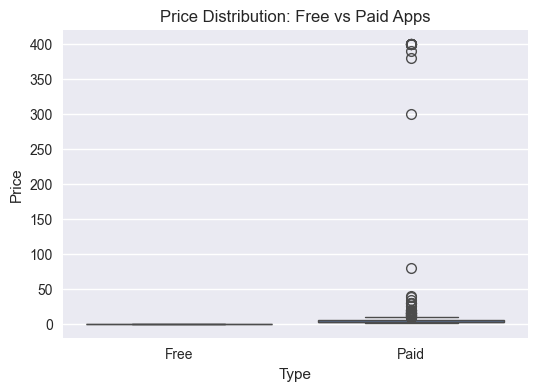

In [10]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Type', y='Price', data=apps)
plt.title("Price Distribution: Free vs Paid Apps")
plt.show()


In [11]:
reviews = pd.read_csv("../data/user_reviews.csv")
reviews.head()


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


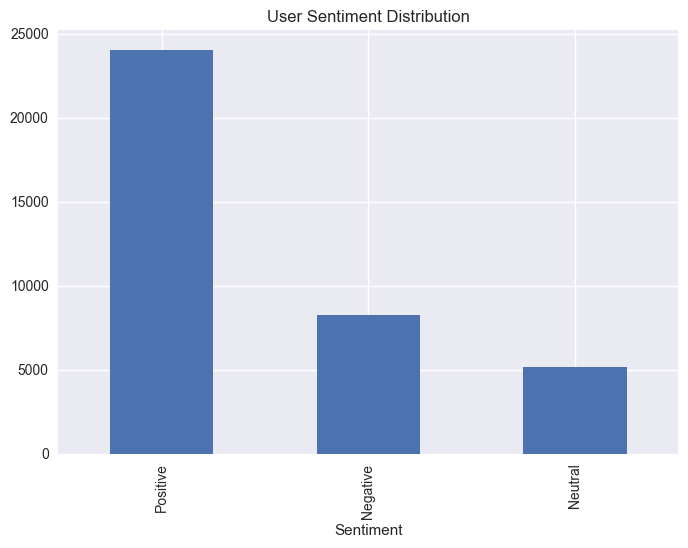

In [12]:
reviews['Sentiment'].value_counts().plot(kind='bar')
plt.title("User Sentiment Distribution")
plt.show()


In [13]:
import os
os.makedirs("../visuals", exist_ok=True)
plt.savefig("../visuals/sample_visual.png")


<Figure size 800x550 with 0 Axes>

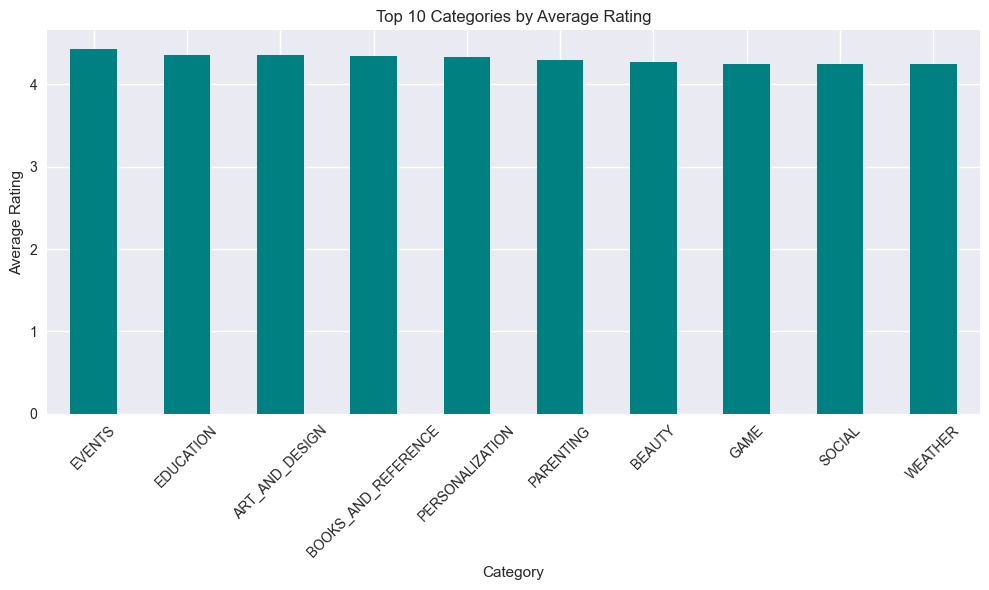

In [14]:
avg_rating = apps.groupby('Category')['Rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
avg_rating.head(10).plot(kind='bar', color='teal')
plt.title("Top 10 Categories by Average Rating")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


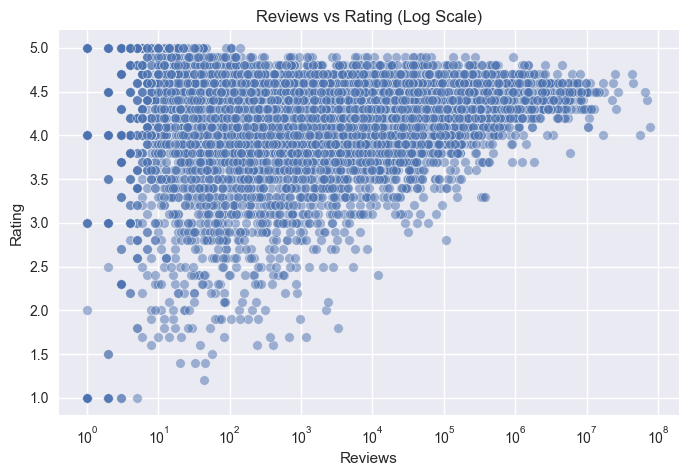

In [15]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    x='Reviews',
    y='Rating',
    data=apps,
    alpha=0.5
)
plt.xscale('log')
plt.title("Reviews vs Rating (Log Scale)")
plt.show()


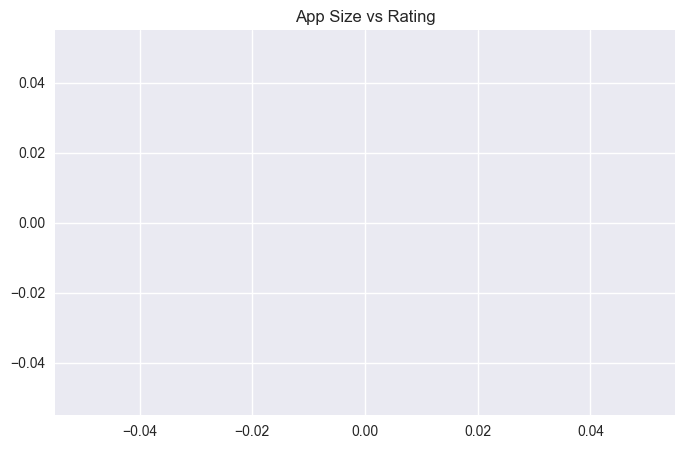

In [16]:
apps['Size'] = apps['Size'].str.replace('M', '', regex=False)
apps['Size'] = apps['Size'].str.replace('k', '', regex=False)
apps['Size'] = pd.to_numeric(apps['Size'], errors='coerce')

plt.figure(figsize=(8,5))
sns.scatterplot(x='Size', y='Rating', data=apps)
plt.title("App Size vs Rating")
plt.show()


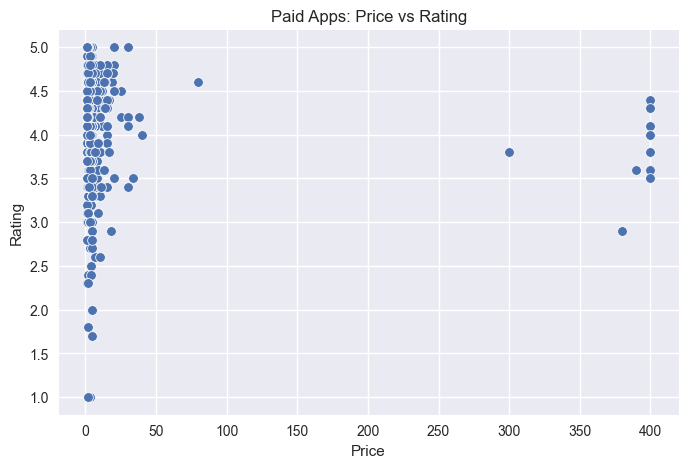

In [17]:
paid_apps = apps[apps['Type'] == 'Paid']

plt.figure(figsize=(8,5))
sns.scatterplot(x='Price', y='Rating', data=paid_apps)
plt.title("Paid Apps: Price vs Rating")
plt.show()


In [18]:
import os
os.makedirs("../visuals", exist_ok=True)

plt.figure(figsize=(10,6))
avg_rating.head(10).plot(kind='bar')
plt.title("Top Categories by Rating")
plt.tight_layout()
plt.savefig("../visuals/top_categories_by_rating.png")
plt.close()


📌 Key Insights from Google Play Store Data


🔹 Category Insights

Certain categories such as Family, Game, and Tools dominate the Play Store in terms of app count.

Categories with fewer apps (e.g., Education, Health & Fitness) often show higher average ratings, indicating quality over quantity.

🔹 Rating Patterns

Most apps have ratings clustered between 4.0 and 4.5, showing generally positive user feedback.

Extremely low-rated apps are relatively rare, suggesting poor-quality apps fail to sustain visibility.

🔹 Popularity & Reviews

Apps with a higher number of reviews tend to have more stable ratings.

New or niche apps may have high ratings but low review counts, indicating early-stage adoption.

🔹 Pricing Trends

The majority of apps on the Play Store are free, highlighting a freemium-driven market.

Paid apps do not necessarily guarantee higher ratings.

Users value utility and experience more than pricing.

🔹 App Size vs User Experience

Very large app sizes do not always correlate with better ratings.

Lightweight apps often perform well, especially in emerging markets with storage constraints.

📌 Business Conclusions

Developers should focus on user experience and performance, not just adding features.

App categories with fewer competitors but high ratings offer growth opportunities.

Freemium models with in-app purchases are more viable than upfront paid pricing.

Monitoring user reviews and feedback is critical for maintaining app quality and visibility.